In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import math

from utilities.data import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

loader = DataLoader()
#grenade_df = loader.load_grenade_df(nrows=20000)
#print(grenade_df.info())
#print(grenade_df.isnull().sum())
#kill_df = loader.load_kill_df()
#print(kills_df.info())
#dmg_df = loader.load_dmg_df(nrows=20000)
#dmg_df = dmg_df[(~dmg_df['seconds'].isna())]
#print(dmg_df.info())
#print(dmg_df.isnull().sum())
cluster_df = loader.load_firefight_df(nrows=40000)
print(cluster_df.info())
cluster_df = cluster_df[cluster_df['att_side'] != 'None']
print(cluster_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25289 entries, 0 to 25288
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner_side  25289 non-null  object 
 1   att_side     25289 non-null  object 
 2   map          25289 non-null  object 
 3   seconds      25289 non-null  float64
 4   pos_x        25289 non-null  float64
 5   pos_y        25289 non-null  float64
 6   hp_dmg       25289 non-null  int64  
 7   pos_type     25289 non-null  object 
 8   index        25289 non-null  int64  
 9   file_round   25289 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.9+ MB
None
winner_side    0
att_side       0
map            0
seconds        0
pos_x          0
pos_y          0
hp_dmg         0
pos_type       0
index          0
file_round     0
dtype: int64
['CounterTerrorist' 'Terrorist']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25029 entries, 0 to 25288
Data columns (total 10 colum

In [2]:
# cluster firefights spatio-temporally
cluster_df = cluster_firefights(cluster_df, eps=0.08, n_samples=6, n_seconds_equiv_to_quarter_map=20, verbose=True)
print(cluster_df.head(5))

esea_match_13770997.dem_1: [0 1]
esea_match_13770997.dem_10: [-1  0]
esea_match_13770997.dem_11: [-1]
esea_match_13770997.dem_12: [-1  0]
esea_match_13770997.dem_13: [-1]
esea_match_13770997.dem_14: [-1]
esea_match_13770997.dem_15: [-1]
esea_match_13770997.dem_17: [-1]
esea_match_13770997.dem_18: [-1]
esea_match_13770997.dem_19: [-1]
esea_match_13770997.dem_2: [-1]
esea_match_13770997.dem_20: [-1]
esea_match_13770997.dem_21: [-1]
esea_match_13770997.dem_22: [-1  0]
esea_match_13770997.dem_23: [-1]
esea_match_13770997.dem_24: [-1  0]
esea_match_13770997.dem_25: [-1]
esea_match_13770997.dem_3: [-1]
esea_match_13770997.dem_4: [-1  0  1  2  3]
esea_match_13770997.dem_5: [-1]
esea_match_13770997.dem_6: [-1]
esea_match_13770997.dem_7: [-1]
esea_match_13770997.dem_8: [-1]
esea_match_13770997.dem_9: [-1]
esea_match_13779704.dem_1: [-1]
esea_match_13779704.dem_10: [-1]
esea_match_13779704.dem_11: [-1  0]
esea_match_13779704.dem_12: [-1  0  1]
esea_match_13779704.dem_13: [-1]
esea_match_13779704

esea_match_13779780.dem_5: [-1  0  1  2]
esea_match_13779780.dem_6: [-1]
esea_match_13779780.dem_7: [-1]
esea_match_13779780.dem_8: [-1]
esea_match_13779780.dem_9: [-1  0  1]
esea_match_13779786.dem_1: [-1]
esea_match_13779786.dem_10: [-1]
esea_match_13779786.dem_11: [-1]
esea_match_13779786.dem_12: [-1  0]
esea_match_13779786.dem_13: [-1  0]
esea_match_13779786.dem_14: [-1  0  1]
esea_match_13779786.dem_15: [-1]
esea_match_13779786.dem_16: [-1  0]
esea_match_13779786.dem_17: [-1  0]
esea_match_13779786.dem_18: [-1]
esea_match_13779786.dem_19: [-1  0]
esea_match_13779786.dem_2: [-1]
esea_match_13779786.dem_20: [-1]
esea_match_13779786.dem_21: [-1  0  1]
esea_match_13779786.dem_22: [-1  0  1  2]
esea_match_13779786.dem_23: [-1]
esea_match_13779786.dem_24: [-1  0  1  2]
esea_match_13779786.dem_25: [-1]
esea_match_13779786.dem_26: [-1  0]
esea_match_13779786.dem_27: [-1  0  1]
esea_match_13779786.dem_28: [-1  0  1]
esea_match_13779786.dem_29: [-1]
esea_match_13779786.dem_3: [-1  0]
esea_m

esea_match_13779805.dem_16: [-1  0]
esea_match_13779805.dem_17: [-1]
esea_match_13779805.dem_18: [-1  0]
esea_match_13779805.dem_19: [-1]
esea_match_13779805.dem_2: [-1  0  1]
esea_match_13779805.dem_20: [-1]
esea_match_13779805.dem_21: [-1]
esea_match_13779805.dem_22: [-1]
esea_match_13779805.dem_23: [-1  0  1]
esea_match_13779805.dem_24: [-1  0  1]
esea_match_13779805.dem_25: [-1]
esea_match_13779805.dem_26: [-1]
esea_match_13779805.dem_27: [-1]
esea_match_13779805.dem_28: [-1]
esea_match_13779805.dem_29: [-1  0]
esea_match_13779805.dem_3: [-1]
esea_match_13779805.dem_30: [-1]
esea_match_13779805.dem_4: [-1]
esea_match_13779805.dem_5: [-1]
esea_match_13779805.dem_6: [-1]
esea_match_13779805.dem_7: [-1  0  1]
esea_match_13779805.dem_8: [-1]
esea_match_13779805.dem_9: [-1  0  1  2]
esea_match_13779806.dem_1: [-1]
esea_match_13779806.dem_10: [-1  0]
esea_match_13779806.dem_11: [-1]
esea_match_13779806.dem_12: [-1  0]
esea_match_13779806.dem_13: [-1]
esea_match_13779806.dem_14: [-1]
esea

esea_match_13779824.dem_3: [-1]
esea_match_13779824.dem_4: [-1]
esea_match_13779824.dem_5: [-1]
esea_match_13779824.dem_6: [-1]
esea_match_13779824.dem_7: [-1]
esea_match_13779824.dem_8: [-1]
esea_match_13779824.dem_9: [-1]
esea_match_13779825.dem_1: [-1]
esea_match_13779825.dem_10: [-1]
esea_match_13779825.dem_11: [-1]
esea_match_13779825.dem_12: [-1]
esea_match_13779825.dem_13: [-1]
esea_match_13779825.dem_14: [-1]
esea_match_13779825.dem_15: [-1]
esea_match_13779825.dem_16: [-1  0]
esea_match_13779825.dem_17: [-1]
esea_match_13779825.dem_18: [-1]
esea_match_13779825.dem_19: [-1]
esea_match_13779825.dem_2: [-1]
esea_match_13779825.dem_20: [-1]
esea_match_13779825.dem_21: [-1]
esea_match_13779825.dem_22: [-1]
esea_match_13779825.dem_23: [-1]
esea_match_13779825.dem_24: [-1]
esea_match_13779825.dem_25: [-1]
esea_match_13779825.dem_26: [-1]
esea_match_13779825.dem_3: [-1]
esea_match_13779825.dem_4: [-1]
esea_match_13779825.dem_5: [-1]
esea_match_13779825.dem_6: [-1]
esea_match_13779825.

esea_match_13779837.dem_3: [-1]
esea_match_13779837.dem_30: [-1]
esea_match_13779837.dem_31: [-1]
esea_match_13779837.dem_32: [-1  0  1]
esea_match_13779837.dem_33: [-1]
esea_match_13779837.dem_34: [-1  0]
esea_match_13779837.dem_35: [-1]
esea_match_13779837.dem_36: [-1  0]
esea_match_13779837.dem_37: [-1  0]
esea_match_13779837.dem_38: [-1  0]
esea_match_13779837.dem_39: [-1  0]
esea_match_13779837.dem_4: [-1]
esea_match_13779837.dem_40: [-1]
esea_match_13779837.dem_41: [-1  0]
esea_match_13779837.dem_42: [-1  0]
esea_match_13779837.dem_43: [-1  0]
esea_match_13779837.dem_44: [-1  0  1]
esea_match_13779837.dem_45: [-1  0]
esea_match_13779837.dem_46: [-1  0]
esea_match_13779837.dem_5: [-1]
esea_match_13779837.dem_6: [-1]
esea_match_13779837.dem_7: [-1]
esea_match_13779837.dem_8: [-1]
esea_match_13779837.dem_9: [-1]
esea_match_13779839.dem_1: [-1]
esea_match_13779839.dem_10: [-1]
esea_match_13779839.dem_11: [-1]
esea_match_13779839.dem_12: [-1]
esea_match_13779839.dem_13: [-1  0]
esea_m

esea_match_13779851.dem_20: [-1]
esea_match_13779851.dem_21: [-1]
esea_match_13779851.dem_22: [-1]
esea_match_13779851.dem_23: [-1]
esea_match_13779851.dem_24: [-1]
esea_match_13779851.dem_25: [-1]
esea_match_13779851.dem_26: [-1]
esea_match_13779851.dem_27: [-1]
esea_match_13779851.dem_28: [-1]
esea_match_13779851.dem_29: [-1]
esea_match_13779851.dem_3: [-1]
esea_match_13779851.dem_30: [-1]
esea_match_13779851.dem_31: [-1]
esea_match_13779851.dem_32: [-1]
esea_match_13779851.dem_33: [-1  0]
esea_match_13779851.dem_34: [-1  0]
esea_match_13779851.dem_4: [-1]
esea_match_13779851.dem_5: [-1]
esea_match_13779851.dem_6: [-1]
esea_match_13779851.dem_7: [-1]
esea_match_13779851.dem_8: [-1]
esea_match_13779851.dem_9: [-1]
esea_match_13779852.dem_1: [-1]
esea_match_13779852.dem_10: [-1]
esea_match_13779852.dem_11: [-1]
esea_match_13779852.dem_12: [-1  0]
esea_match_13779852.dem_13: [-1]
esea_match_13779852.dem_14: [-1]
esea_match_13779852.dem_16: [-1]
esea_match_13779852.dem_17: [-1]
esea_matc

In [3]:
# Cluster spatially

pos_type_eps = {'DMG_ATT': 0.004, 
                'DMG_VIC': 0.003, 
                'Smoke': 0.0045, 
                'Flash': 0.005, 
                'HE': 0.004, 
                'Incendiary': 0.008, 
                'Molotov': 0.008}
cluster_df = cluster_positions(cluster_df, eps_map=pos_type_eps, verbose=True)
print(cluster_df.isna().sum())

DMG_ATT CounterTerrorist
CounterTerrorist, DMG_ATT: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]), array([783,   6,   5,   4,   6,   5,   4,   5,   6,   5,   4,   4,   4,
         5,   7,   4,  15,   6,   5,   4,   4,   5,   6,   4,   6,   8,
         6,   5,   4,   4,   4,   5,   7,   4,   4,   5,   4,   4,   4,
         5,   4,   4,   4,   9,   4,   4,   7,   5,   7,  11,   4,   4,
         7,   4,   5,   4,   4,   5,   4,   5,   5,   4,   5,   7,   4,
         5,   4,   4,   4,   5,   4,   4,   4,   8,   4,   4,   6,   4,
         5,   4,   4,   4,   5,   4,   4,   4,   4,   4,   4,   9,   4,
         5,

CounterTerrorist, Smoke: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]), array([1007,   27,   21,   37,    6,  253,  312,  165,   23,    4,  131,
        132,    6,   54,   11,    8,   20,    5,   25,    4,    9,   10,
          4,    4,   16,    4,    4,    5,    4,    9,    4,    4,   36,
         33,    9,    9,    7,    5,    5,    5,    8,    7,    5,    8,
          3,    8,    4,    4,    9]))
Smoke Terrorist
Terrorist, Smoke: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]), array([1292,    8,    7,  114,  104,   32,  108,    8,    4,   15,   15,
         10,   10,    5,   25,

In [68]:
display_df = cluster_df.copy()
display_df['seconds'] /= (max_round_length/20) * (1/4)
display_df[["seconds", "pos_x", "pos_y"]] = min_max_scaler.inverse_transform(display_df[['seconds', 'pos_x', 'pos_y']])
display_df = display_df.dropna()

POS CLUSTERS: [-1 2 7 23 168 170 181 242 281 319 320 321 345 346]
FIREFIGHT CLUSTERS: [-1 0 1 2]
2027      7
2028     -1
2029     -1
2030     23
2031     -1
         ..
27948    -1
27949    -1
27950    -1
27951    -1
27952    -1
Name: pos_cluster, Length: 66, dtype: object


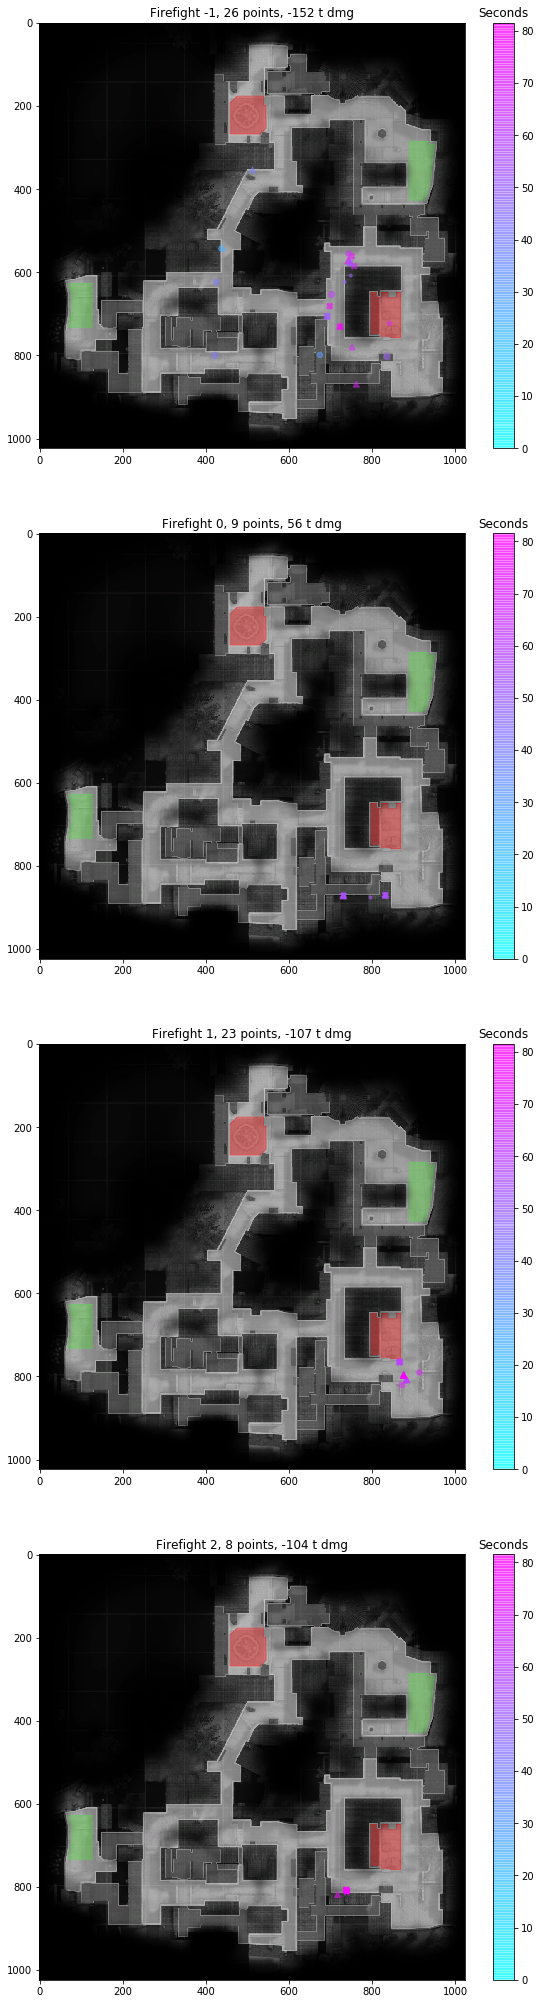

In [70]:
import matplotlib as mpl

map_filenames = {map_name: f'../data/{map_name}.png' for map_name in grenade_df['map'].unique()}
def visualize_ff_clusters(cluster_df, file_round):
    df = cluster_df[cluster_df['file_round'] == file_round]
    print(f"POS CLUSTERS: {np.unique(df['pos_cluster'])}")
    print(f"FIREFIGHT CLUSTERS: {np.unique(df['firefight_cluster'])}")
    print(df['pos_cluster'])
    num_pos_clusters = len(np.unique(df['pos_cluster']))
    num_ff_clusters = len(np.unique(df['firefight_cluster']))
    fig, axes = plt.subplots(num_ff_clusters, figsize=(10,36))
    #for i, pos_cluster in enumerate(np.unique(df['pos_cluster'])):
    #    axes[i, 0].set_title(f'Cluster {i}')
    #    pts = df[df['pos_cluster'] == pos_cluster]
    #    map_name = pts.iloc[0]['map']
    #    im = plt.imread(map_filenames[map_name])
    #    axes[i, 0].imshow(im)
    #    axes[i, 0].scatter(pts['pos_x'], pts['pos_y'], c=pts['seconds'])
    norm = mpl.colors.Normalize(vmin=0, vmax=max(df['seconds']))
    cmap = mpl.cm.cool
    for i, firefight_cluster in enumerate(np.unique(df['firefight_cluster'])):
        pts = df[df['firefight_cluster'] == firefight_cluster]
        net_t_dmg = pts.iloc[0]['firefight_net_t_dmg']
        axes[i].set_title(f'Firefight {firefight_cluster}, {len(pts)} points, {net_t_dmg} t dmg')
        map_name = pts.iloc[0]['map']
        im = plt.imread(map_filenames[map_name])
        axes[i].imshow(im)
        markers = {'DMG_ATT': '^', 'DMG_VIC': 'X', 'Smoke': 'o', 'HE': 'H', 'Flash': '.', 'Molotov': '*', 'Incendiary': '*', }
        for pt_type, marker in markers.items():
            pts_type = pts[pts['pos_type'] == pt_type]
            sct = axes[i].scatter(pts_type['pos_x'], pts_type['pos_y'], c=pts_type['seconds'], marker=marker, cmap='cool', norm=norm, alpha=0.5)
        cb = plt.colorbar(sct, ax=axes[i])
        cb.ax.set_title('Seconds')
    plt.show()
visualize_ff_clusters(display_df, 'esea_match_13779771.dem_24')

POS CLUSTERS: [-1 1 3 4 5 7 10 12 14 28 41 45 47 56 68 69 72 80 81 82 83 85 98 102 106
 112 113 114 115 116 124 126 127 128 129 130 131 132 133 134 135 136 137
 138 151 472 631 635]
FIREFIGHT CLUSTERS: [-1 0 1 2 3 4 5 6 7 8 9 10]
563        5
564        1
565        7
566       -1
567       10
        ... 
22414     -1
22415    133
22416     -1
22417    134
22418     -1
Name: pos_cluster, Length: 181, dtype: object


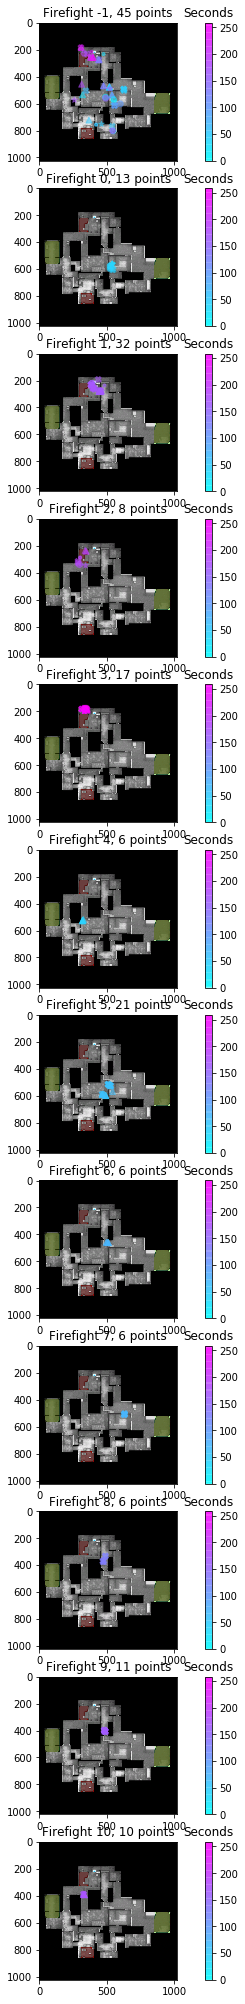

In [43]:
visualize_ff_clusters(display_df, 'esea_match_13779704.dem_21')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-use

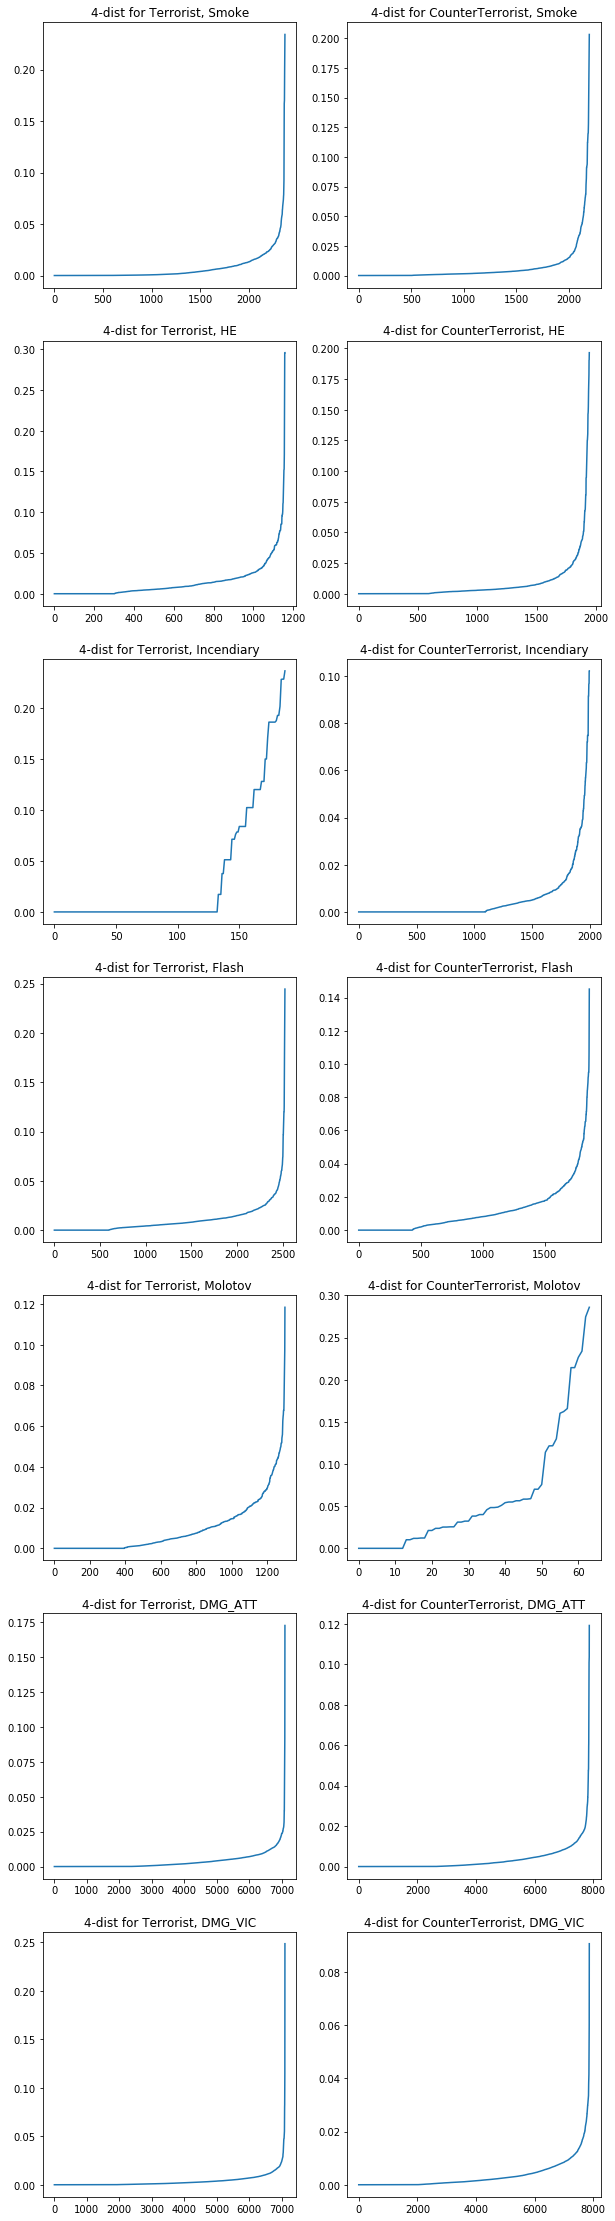

In [44]:
# https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm


def visualize_k_distance(cluster_df, map_name):
    cluster_df = cluster_df[cluster_df['map'] == map_name]
    teams = ['Terrorist', 'CounterTerrorist']
    pos_types = cluster_df['pos_type'].unique()
    map_filenames = {map_name: f'../data/{map_name}.png' for map_name in grenade_df['map'].unique()}
    fig, axes = plt.subplots(len(pos_types), len(teams), figsize=(10,40))

    for i, team in enumerate(teams):
        for j, pos_type in enumerate(pos_types):
            df = cluster_df[(cluster_df['att_side'] == team) & (cluster_df['pos_type'] == pos_type)]
            p, pm = k_distances2(df[['pos_x', 'pos_y']].values, 4)
            axes[j, i].plot(pm)
            axes[j, i].set_title(f'4-dist for {team}, {pos_type}')
            #axes[j, i].ylabel('n');
            #axes[j, i].xlabel('Epsilon distance');
            
    plt.show()
visualize_k_distance(cluster_df, 'de_mirage')

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

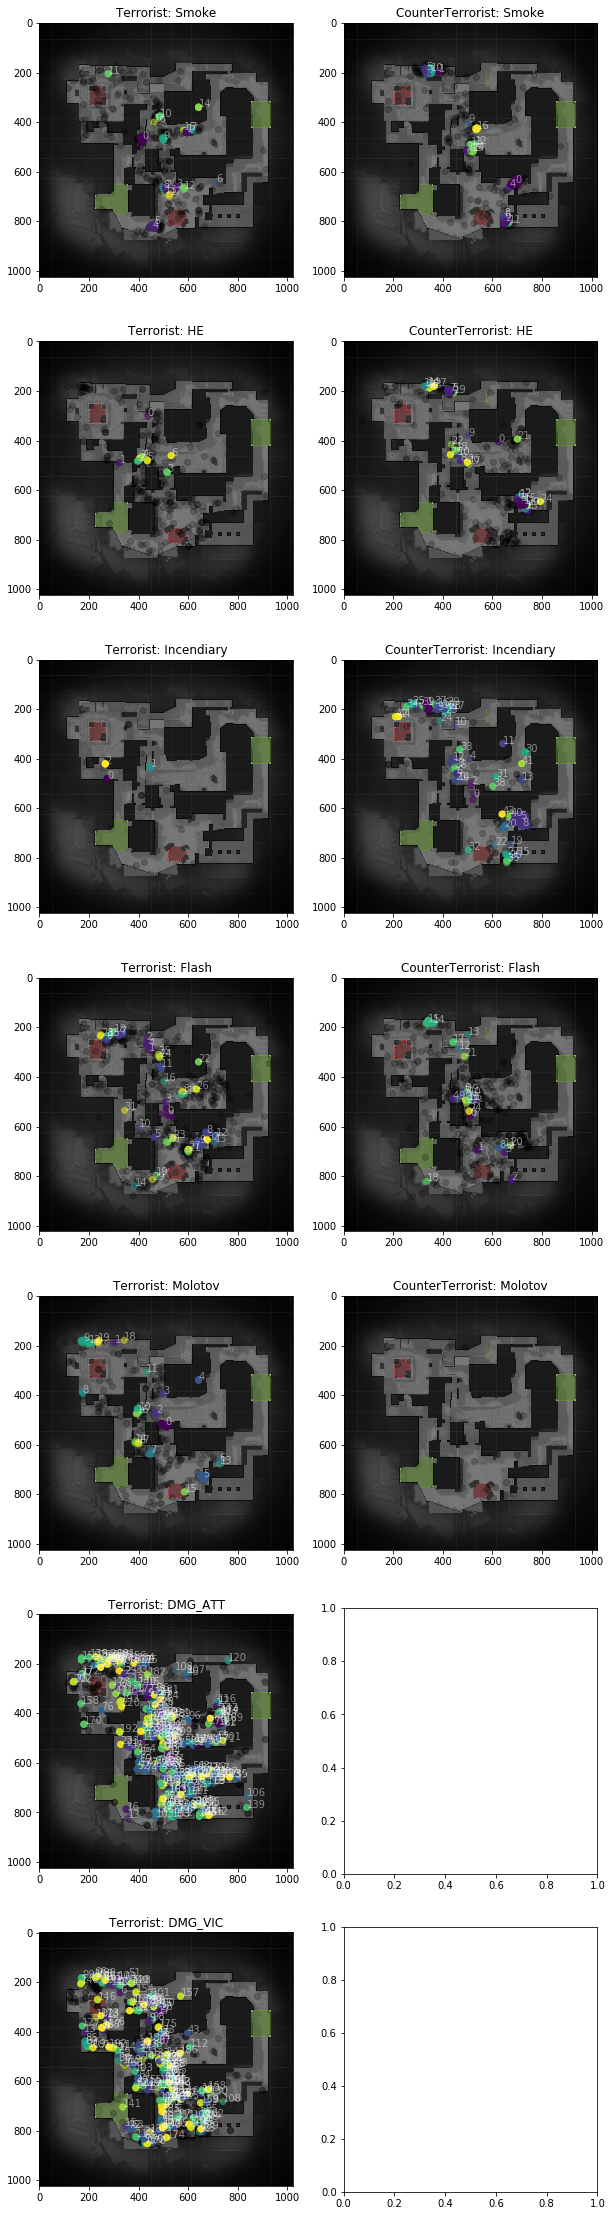

In [45]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

def visualize_pos_clusters(cluster_df, map_name):
    cluster_df = cluster_df[cluster_df['map'] == map_name]
    teams = ['Terrorist', 'CounterTerrorist']
    pos_types = cluster_df['pos_type'].unique()
    map_filenames = {map_name: f'../data/{map_name}.png' for map_name in grenade_df['map'].unique()}
    fig, axes = plt.subplots(len(pos_types), len(teams), figsize=(10,40))

    for i, team in enumerate(teams):
        for j, pos_type in enumerate(pos_types):
            df = cluster_df[(cluster_df['att_side'] == team) & (cluster_df['pos_type'] == pos_type)]            
            axes[j, i].set_title(f'{team}: {pos_type}')
            im = plt.imread(map_filenames[map_name])
            axes[j, i].imshow(im)
            not_clustered = df[df['pos_cluster'] == -1]
            axes[j, i].scatter(not_clustered['pos_x'], not_clustered['pos_y'], c='black', alpha=0.2)
            df = df[df['pos_cluster'] != -1]
            axes[j, i].scatter(df['pos_x'], df['pos_y'], c=df['pos_cluster'], alpha=0.5)
            
            centroids = NearestCentroid()
            pts = pd.concat([df['pos_x'], df['pos_y']], axis=1)
            centroids.fit(pts, df['pos_cluster'].astype('int'))    
            nade_clusters = centroids.centroids_
            for k, pos in enumerate(zip(nade_clusters[:, 0], nade_clusters[:, 1])):
                axes[j, i].annotate(str(k), pos, color='white', fontsize=10, alpha=0.5)
    plt.show()
visualize_pos_clusters(display_df, 'de_mirage')

winner_side          0
att_side             0
map                  0
seconds              0
pos_x                0
pos_y                0
pos_type             0
index                0
file_round           0
firefight_cluster    0
dtype: int64


In [56]:
# Compute clustering metrics
grenade_df['cluster'] = cluster_df[cluster_df['pos_type'] == 'GRENADE']['cluster']
grenade_df['cluster'] = cluster_df[cluster_df['pos_type'] == 'GRENADE']['cluster']

KeyError: 'cluster'

In [71]:
print(len(cluster_df[(cluster_df['firefight_cluster'] != -1) & (cluster_df['pos_cluster'] != -1)]))

22842
